     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.3 MB/s eta 0:00:0031m18.6 MB/s eta 0:00:01
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/00/2e/d53fa4befbf2cfa713304affc7ca780ce4fc1fd8710527771b58311a3229/click-8.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/af/14/97ba8f3eb4275b2fdeae73d79b74bd0b8995c6e22c7aa7e90a547c19cf90/regex-2023.10.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 18.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [134]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
from lxml import etree  # 파서 
from nltk.tokenize import word_tokenize, sent_tokenize

In [126]:
sample_tweets = pd.read_csv("sample.csv")

In [127]:
sample_tweets.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


In [208]:
def get_users(tweets = pd):
    return tweets["author_id"].unique()
def get_top_tweeted_users(tweets = pd):
    user_tweet_count = tweets.groupby(["author_id"]).count()['text'].reset_index(name="count")
    top_tweeted_user = user_tweet_count.sort_values("count", ascending=False).head(10)
    return top_tweeted_user
def get_tweet_from_user(tweets = pd, author_id = "AppleSupport"):
    return tweets["text"].where(tweets["author_id"] == author_id).dropna()
    

/Users/gimhanseul/opt/anaconda3/envs/torch/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gimhanseul/opt/anaconda3/envs/torch/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gimhanseul/opt/anaconda3/envs/torch/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Tweet count')

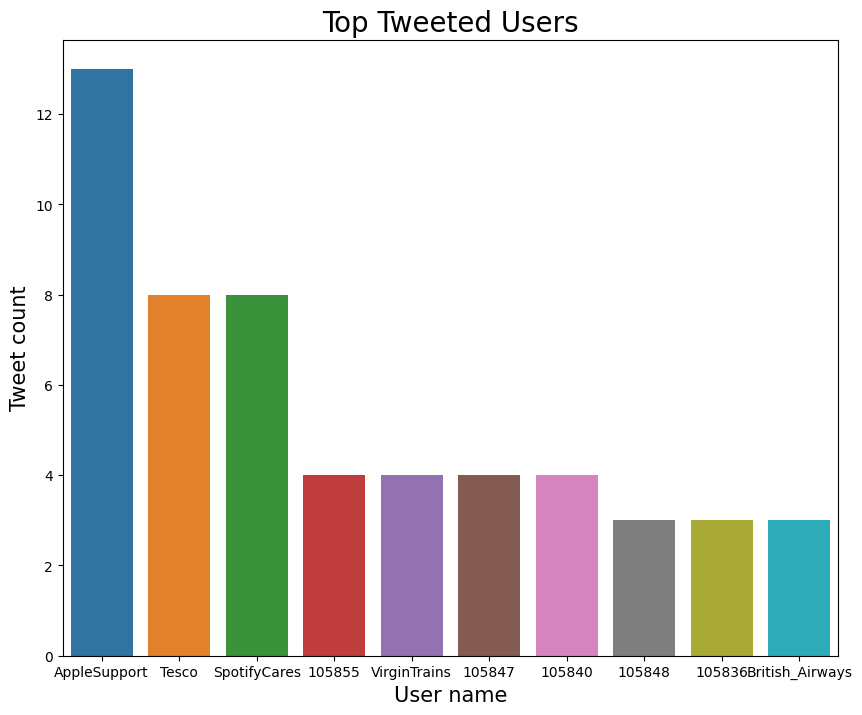

In [129]:
user_ids = get_users(tweets = sample_tweets)
top_tweeted_user = get_top_tweeted_users(tweets = sample_tweets)
ax = plt.figure(figsize = (10,8))
sns.barplot(data = top_tweeted_user , x = "author_id" , y = "count")
plt.title("Top Tweeted Users", size = 20)
plt.xlabel("User name", size = 15)
plt.ylabel("Tweet count", size = 15)

In [193]:
contentText = re.sub('\([^)]*\)', '', ". ".join(tweet for tweet in list(sample_tweets["text"])))
# (배경음) 제거

sentText = sent_tokenize(contentText)
# 문장 단위 토큰화 

# 대문자 => 소문자, 구두점 제거 (영문, 숫자 제외)
normalizedText = [] 
for sent in sentText: 
    tokens = re.sub("[^a-z0-9]+"," ",sent.lower())
    normalizedText.append(tokens)
result = [ word_tokenize(s) for s in normalizedText ] 

In [224]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=result , window = 10, min_count=1 , workers = 4 , sg = 0)

In [229]:
top_user_tweets = list(get_tweet_from_user(tweets=sample_tweets))
top_user_tweets[0]
model.wv.most_similar("macbook")



[('online', 0.26285025477409363),
 ('many', 0.2599624693393707),
 ('2', 0.2555956542491913),
 ('request', 0.2453072965145111),
 ('contact', 0.23387785255908966),
 ('ba8733', 0.23046547174453735),
 ('105839', 0.22152143716812134),
 ('yep', 0.22127112746238708),
 ('them', 0.21291685104370117),
 ('settings', 0.21259839832782745)]

In [226]:
top_user_tweets[0]

'@105837 We can help. Which version of iOS are you on? You can find that in Settings &gt; General &gt; About. Reply in DM. https://t.co/GDrqU22YpT'

[['applesupport',
  'causing',
  'the',
  'reply',
  'to',
  'be',
  'disregarded',
  'and',
  'the',
  'tapped',
  'notification',
  'under',
  'the',
  'keyboard',
  'is',
  'opened'],
 ['105835', 'your', 'business', 'means', 'a', 'lot', 'to', 'us'],
 ['please',
  'dm',
  'your',
  'name',
  'zip',
  'code',
  'and',
  'additional',
  'details',
  'about',
  'your',
  'concern'],
 ['rr', 'https', 't', 'co', 'znuu1vjn9r'],
 ['76328',
  'i',
  'really',
  'hope',
  'you',
  'all',
  'change',
  'but',
  'i',
  'm',
  'sure',
  'you',
  'won',
  't'],
 ['because', 'you', 'don', 't', 'have', 'to'],
 ['105836',
  'livechat',
  'is',
  'online',
  'at',
  'the',
  'moment',
  'https',
  't',
  'co',
  'sy94vtu8kq',
  'or',
  'contact',
  '03331',
  '031',
  '031',
  'option',
  '1',
  '4',
  '3',
  'to',
  'request',
  'a',
  'call',
  'back'],
 ['virgintrains', 'see', 'attached', 'error', 'message'],
 ['i',
  've',
  'tried',
  'leaving',
  'a',
  'voicemail',
  'several',
  'times',
  'i